# Generate Forces and other info using OpenMM

In [ ]:
#!conda create -c conda-forge --name offtk openff-toolkit
#!conda update -c conda-forge openff-toolkit

In [1]:
import sys
print(sys.version)
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash Miniconda3-py*.sh -bfp /usr/local
!conda config --set always_yes yes
!conda config --add channels conda-forge
!conda create -n openmm python=3.7 cudatoolkit=10.0 git jupyterlab matplotlib ipympl rdkit openbabel openmm mdtraj pymbar pdbfixer parmed openff-toolkit openmoltools openmmforcefields
sys.path.append('/usr/local/envs/openmm/lib/python3.7/site-packages')
import openmm.testInstallation
openmm.testInstallation.main()

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
--2022-05-13 07:59:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>]  84.90M  87.3MB/s    in 1.0s    

2022-05-13 07:59:02 (87.3 MB/s) - ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37

In [2]:
%matplotlib widget
from sys import stdout

import matplotlib.pyplot as plt
import mdtraj
#import nglview
import numpy as np
import pandas
from openmm import *
from openmm.app import *
from openmm.unit import *

In [51]:
import numpy as np

# For math and stats operations
from scipy.spatial.transform import Rotation as R
from scipy.stats import multivariate_normal

# For plotting
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly

# For saving and loading
import pickle
%matplotlib inline

num_imgs = 1024

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Set the Integrator and Simulator

In [ ]:
# For Alanine Dipeptide
pdb = PDBFile('alanine-dipeptide.pdb')
forcefield = ForceField('amber14-all.xml')
system = forcefield.createSystem(pdb.topology, nonbondedCutoff=3*nanometer, constraints=HBonds)
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 2*femtoseconds)
simulation = Simulation(pdb.topology, system, integrator)

#simulation.minimizeEnergy()

simulation.context.setPositions(pdb.positions)

state0 = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
temp_pos = state0.getPositions(asNumpy=True)

print("Potential energy")
print(state0.getPotentialEnergy())
print("Forces")
print(state0.getForces(asNumpy=True))
simulation.context.setPositions(temp_pos - temp_pos.mean(axis = 0))

Potential energy
-55.7625732421875 kJ/mol
Forces
[[ 1.72658480e+02  3.18556099e+01 -6.91528261e-01]
 [ 2.59057024e+02  3.51844774e+02  2.29770076e+00]
 [ 5.63852939e+00 -4.46114412e+01 -4.22269926e+01]
 [ 7.14586237e+00 -4.38244949e+01  4.05362426e+01]
 [-4.02899878e+02 -2.42344227e+02  2.35714243e+02]
 [-7.01274296e+02 -3.69465459e+02  3.87781887e+02]
 [-9.85475383e+01 -7.81068420e+02 -4.00156355e+02]
 [ 5.08884265e+01  4.82248179e+01 -7.38189602e+00]
 [ 4.35663718e+02  3.07759174e+02  1.92628458e+02]
 [-2.06124050e+01 -1.23629185e+01  4.30327981e+01]
 [-5.85695208e+00 -1.18954357e+02 -3.56133560e+02]
 [ 1.73149408e+01 -2.76461938e+01 -6.26491011e+01]
 [ 8.15757353e+01 -1.99023637e+02 -1.29554635e+02]
 [ 4.05781893e+02  2.61510470e+02 -3.33173004e+02]
 [-8.09130857e+01  5.53434126e+01  2.68172144e+02]
 [-2.07701931e+02 -5.56255026e+01 -1.79741006e+01]
 [-5.81181549e+01  3.29426543e+02  1.88955516e+02]
 [-1.38398790e+02 -1.00197490e+02 -6.89647961e+00]
 [ 2.77525768e+02  2.05088517e+02

In [ ]:
"""
state0 = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)

print("Potential energy")
print(state0.getPotentialEnergy())

print("Kinetic energy")
print(state0.getKineticEnergy())

print("Parameters")
print(state0.IntegratorParameters)

print("Atomic positions")
print(state0.getPositions(asNumpy=True))
print()

print("Forces")
print(state0.getForces(asNumpy=True))"""

In [ ]:
x0 = torch.tensor(np.asarray(state0.getPositions(asNumpy=True)))
latentvec = torch.randn_like(x0)

simulation.context.setPositions(latentvec.numpy())
print(latentvec.numpy())

state = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
print(state.getPositions(asNumpy=True))

potential = torch.tensor(state.getPotentialEnergy()._value)
print(potential)

NameError: ignored

# Creating Images

In [53]:
# Generate rotation matrices
rot_mats = []
for n in range(num_imgs):
    r = R.from_euler('zyx', [[np.random.uniform(0, 2*np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi)]],
                     degrees=False)
    rot_mats.append(r.as_matrix()[0])

In [50]:
def createblobs(coords, Q=1, n_cells=51, scale=0.001, noise=1, rot_mat=np.eye(3)):
    # Grids of x and y points
    x = np.linspace(-Q, Q, n_cells)
    y = np.linspace(-Q, Q, n_cells)
    # Create a 2-D meshgrid of (x, y) coordinates.
    x, y = np.meshgrid(x, y)

    normals = np.zeros_like(x)

    # Creating mixture of gaussians
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    new_coords = np.asarray(coords) @ rot_mat.T

    for row in new_coords:
        var = multivariate_normal(mean=row[0:2], cov=scale*np.eye(2))
        normals = normals + var.pdf(pos)

    normals = normals/len(new_coords) + np.random.normal(0, noise, size=normals.shape)
    return normals

In [16]:
pot_energies = []
forces_list = []
pos_list = []
img_list = []

for i in range(num_imgs):
    if i%64 == 0:
        print(f'Starting step: {i}...')
    
    simulation.step(1000)
    state0 = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
    temp_pos = state0.getPositions(asNumpy=True)
    simulation.context.setPositions(temp_pos - temp_pos.mean(axis = 0))

    pot_energies.append(state0.getPotentialEnergy())
    pos_list.append(state0.getPositions(asNumpy=True))
    forces_list.append(state0.getForces(asNumpy=True))
    img_list.append(createblobs(pos_list[-1], Q=1, n_cells=51, scale=0.001, noise=4, rot_mat=rot_mats[i]))

Starting step: 0...
Starting step: 64...
Starting step: 128...


KeyboardInterrupt: ignored

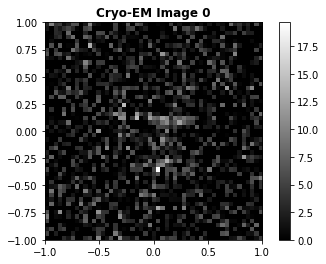

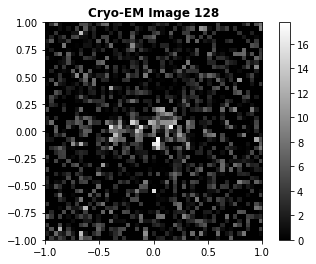

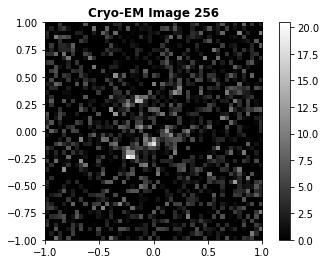

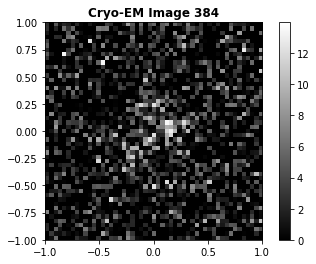

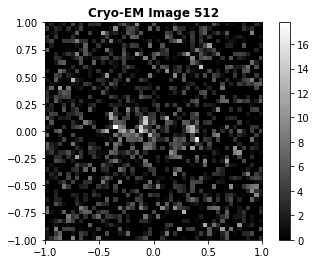

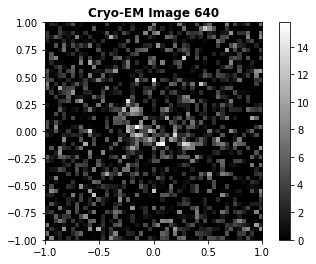

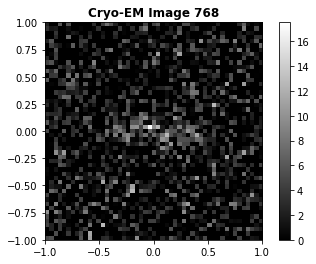

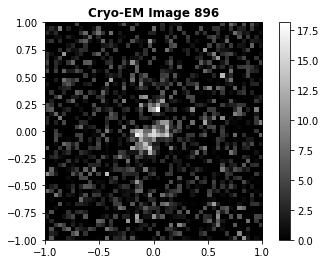

In [ ]:
for idx, img in enumerate(img_list):
    if idx % 128 == 0:
        c = plt.imshow(img, cmap ='gray', vmin = 0, vmax = np.abs(img).max(),\
                        extent = [-1, 1, -1, 1], interpolation = 'nearest', origin = 'lower')
        plt.colorbar(c)
                
        plt.title(f'Cryo-EM Image {idx}', fontweight = "bold")
        plt.show()

In [ ]:
with open('aldip_img1024_dim51_nse4_scl0.001_q1.pkl', 'wb') as outp:
    pickle.dump(rot_mats, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(pot_energies, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(forces_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(pos_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(img_list, outp, pickle.HIGHEST_PROTOCOL)

# Generate Water Molecule images

In [34]:
topology = Topology()
chain = topology.addChain()
residue = topology.addResidue("water", chain)
element_O = Element.getByAtomicNumber(8)
element_H = Element.getByAtomicNumber(1)
atom0 = topology.addAtom("O", element_O, residue)
atom1 = topology.addAtom("H", element_H, residue)
atom2 = topology.addAtom("H", element_H, residue)
topology.addBond(atom0, atom1)
topology.addBond(atom0, atom2)

#pdb = PDBFile(pdbfile)
forcefield = ForceField('amber14/tip3pfb.xml')
system = forcefield.createSystem(topology, nonbondedCutoff=1*nanometer, constraints=HBonds)
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 1*femtoseconds)
simulation = Simulation(topology, system, integrator)
simulation.context.setPositions(np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0],
]) * angstroms)
simulation.minimizeEnergy()
#simulation.reporters.append(PDBReporter('output.pdb', 1000))
#simulation.reporters.append(StateDataReporter(stdout, 1000, step=True, volume=True, density=True,
#        potentialEnergy=True, temperature=True))

for i in range(1):
    simulation.step(1000)
    state0 = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)

    print("Potential energy")
    print(state0.getPotentialEnergy())

    print("Atomic positions")
    print(state0.getPositions(asNumpy=True))

    print("Volume")
    print(state0.getPeriodicBoxVolume())

    print("Forces")
    print(state0.getForces(asNumpy=True))

Potential energy
0.12221394746215519 kJ/mol
Atomic positions
[[ 0.00088716  0.01718058  0.01025099]
 [-0.03854672 -0.03676415 -0.06572624]
 [ 0.03175302 -0.04857002  0.08069085]] nm
Volume
8.0 nm**3
Forces
[[ -16.22562325 -226.67192528  -10.48639483]
 [ -28.10968872  119.4190485   -70.19937389]
 [  44.33531198  107.25287677   80.68576872]] kJ/(nm mol)


In [54]:
pot_energies = []
forces_list = []
pos_list = []
img_list = []

for i in range(num_imgs):
    if i%64 == 0:
        print(f'Starting step: {i}...')
    
    simulation.step(10)
    state0 = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
    temp_pos = state0.getPositions(asNumpy=True)
    simulation.context.setPositions(temp_pos - temp_pos.mean())

    pot_energies.append(state0.getPotentialEnergy())
    pos_list.append(state0.getPositions(asNumpy=True))
    forces_list.append(state0.getForces(asNumpy=True))
    img_list.append(createblobs(pos_list[-1], Q=0.2, n_cells=25, scale=0.0002, noise=20, rot_mat=rot_mats[i]))

Starting step: 0...
Starting step: 64...
Starting step: 128...
Starting step: 192...
Starting step: 256...
Starting step: 320...
Starting step: 384...
Starting step: 448...
Starting step: 512...
Starting step: 576...
Starting step: 640...
Starting step: 704...
Starting step: 768...
Starting step: 832...
Starting step: 896...
Starting step: 960...


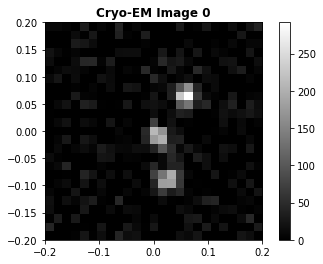

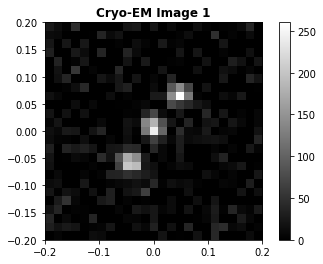

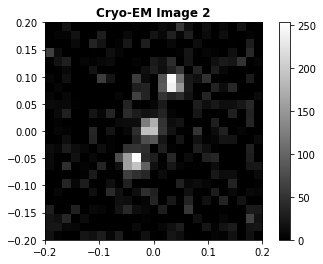

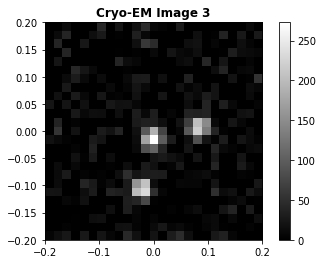

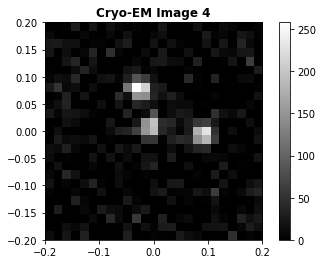

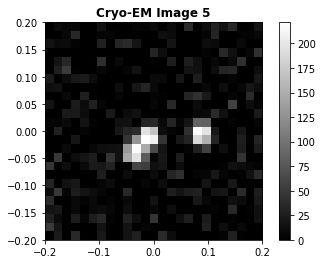

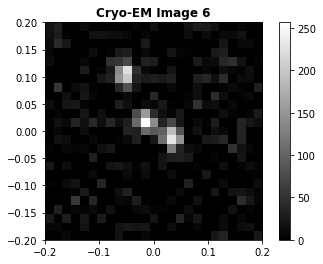

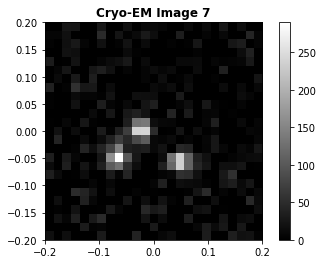

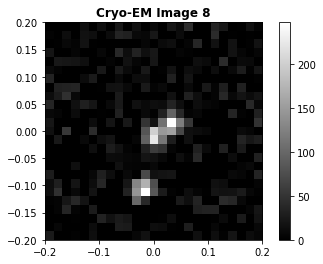

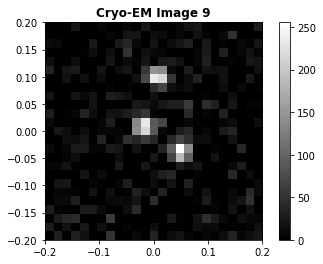

In [56]:
for idx, img in enumerate(img_list):
    if idx < 10:
        c = plt.imshow(img, cmap ='gray', vmin = 0, vmax = np.abs(img).max(),\
                          extent = [-0.2, 0.2, -0.2, 0.2], interpolation = 'nearest', origin = 'lower')
        plt.colorbar(c)
                
        plt.title(f'Cryo-EM Image {idx}', fontweight = "bold")
        plt.show()

In [102]:
with open('water_img1024_dim25_nse20_scl0.0002_q0.2.pkl', 'wb') as outp:
    pickle.dump(rot_mats, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(pot_energies, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(forces_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(pos_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(img_list, outp, pickle.HIGHEST_PROTOCOL)

# Testing manual definition of backward

In [ ]:
class pot_energy(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        reshaped_input = input.reshape(22, 3)
        ctx.save_for_backward(reshaped_input)

        simulation.context.setPositions(reshaped_input.numpy())
        state = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
        return torch.tensor(state.getPotentialEnergy()._value)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        reshaped_input, = ctx.saved_tensors

        simulation.context.setPositions(reshaped_input.numpy())
        state = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
        return -grad_output * torch.tensor(state.getForces(asNumpy=True)._value).reshape(-1, 22*3)

In [ ]:
class testforgrad(nn.Module):
    def __init__(self):
        super().__init__()

        self.mlp = nn.Sequential(
            nn.Linear(22*3, 16),
            nn.Tanh(),
            nn.Linear(16, 22*3)
        )

    def forward(self, x):
        return self.mlp(x)


model = testforgrad()
criterion = pot_energy.apply
x0 = torch.tensor(state0.getPositions(asNumpy=True)._value)
latentvec = torch.randn_like(x0)

print(criterion(latentvec))

tensor(11107284.)


In [ ]:
dtype = torch.FloatTensor

criterion = pot_energy.apply
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

x0 = torch.tensor(state0.getPositions(asNumpy=True)._value)
latentvec = torch.rand_like(x0).reshape(-1, 22*3).type(dtype)

num_epochs = 10000

outputs = []
for epoch in range(num_epochs):
    recon = model(latentvec)
    loss = criterion(recon)
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
#outputs.append((epoch, img, recon))

Epoch:1, Loss:153748.5000
Epoch:101, Loss:204.6476
Epoch:201, Loss:26.3012
Epoch:301, Loss:-7.7145
Epoch:401, Loss:-28.2921
Epoch:501, Loss:-35.3953
Epoch:601, Loss:-38.5880
Epoch:701, Loss:-40.9745
Epoch:801, Loss:-43.0415
Epoch:901, Loss:-45.0374
Epoch:1001, Loss:-46.9806
Epoch:1101, Loss:-48.9795
Epoch:1201, Loss:-51.1909
Epoch:1301, Loss:-56.4013
Epoch:1401, Loss:-71.4531
Epoch:1501, Loss:-72.5018
Epoch:1601, Loss:-71.2412
Epoch:1701, Loss:-78.9259
Epoch:1801, Loss:-79.3498
Epoch:1901, Loss:-74.6742
Epoch:2001, Loss:-85.1770
Epoch:2101, Loss:-83.6346
Epoch:2201, Loss:-90.6889
Epoch:2301, Loss:-89.1582
Epoch:2401, Loss:-95.9112
Epoch:2501, Loss:-95.1540
Epoch:2601, Loss:-100.9433
Epoch:2701, Loss:-100.3247
Epoch:2801, Loss:-104.8878
Epoch:2901, Loss:-104.3761
Epoch:3001, Loss:-107.1953
Epoch:3101, Loss:-106.6264
Epoch:3201, Loss:-108.3238
Epoch:3301, Loss:-108.0258
Epoch:3401, Loss:-42.9447
Epoch:3501, Loss:-109.3320
Epoch:3601, Loss:-103.8906
Epoch:3701, Loss:-110.4914
Epoch:3801, 

In [ ]:
final_mod = model(latentvec).reshape(22,3).detach().numpy()

simulation.context.setPositions(final_mod)
state = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)
print(torch.tensor(state.getPotentialEnergy()._value))

tensor(5.5973e+09)


In [ ]:
x0 = torch.tensor(state0.getPositions(asNumpy=True)._value)
latentvec = torch.rand_like(x0).type(dtype)

print(latentvec)
print(latentvec.reshape(-1, 22*3))
print(latentvec.flatten().reshape(22, 3))

#simulation.context.setPositions(latentvec)
#state = simulation.context.getState(getPositions=True, getForces=True, getEnergy=True)

tensor([[0.4882, 0.5747, 0.2737],
        [0.6518, 0.3538, 0.8322],
        [0.2303, 0.7753, 0.7999],
        [0.9870, 0.0465, 0.6172],
        [0.4539, 0.6631, 0.6428],
        [0.1285, 0.4659, 0.0936],
        [0.4405, 0.9027, 0.3043],
        [0.0556, 0.2521, 0.2805],
        [0.7719, 0.8907, 0.3172],
        [0.4076, 0.7490, 0.6416],
        [0.7815, 0.0531, 0.3283],
        [0.4603, 0.6257, 0.6456],
        [0.3781, 0.6700, 0.3808],
        [0.7838, 0.1377, 0.2557],
        [0.8591, 0.4863, 0.1337],
        [0.0879, 0.2850, 0.8782],
        [0.1791, 0.4578, 0.3835],
        [0.5545, 0.6428, 0.2744],
        [0.3918, 0.5390, 0.4363],
        [0.8288, 0.7963, 0.5471],
        [0.1902, 0.8828, 0.1086],
        [0.5130, 0.4943, 0.3983]])
tensor([[0.4882, 0.5747, 0.2737, 0.6518, 0.3538, 0.8322, 0.2303, 0.7753, 0.7999,
         0.9870, 0.0465, 0.6172, 0.4539, 0.6631, 0.6428, 0.1285, 0.4659, 0.0936,
         0.4405, 0.9027, 0.3043, 0.0556, 0.2521, 0.2805, 0.7719, 0.8907, 0.3172,
        

# NF (Please ignore for now)

In [ ]:
import torch
from torch.autograd import Variable


class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(self, input):
        """
        In the forward pass we receive a Tensor containing the input and return a
        Tensor containing the output. You can cache arbitrary Tensors for use in the
        backward pass using the save_for_backward method.
        """
        self.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(self, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # Construct an instance of our MyReLU class to use in our network
    relu = MyReLU.apply

    # Forward pass: compute predicted y using operations on Variables; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data)

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

In [ ]:
def torch_createblobs(coords, Q=1, n_cells=51, scale=0.001, noise=1, rot_mat=torch.eye(3)):
    # Grids of x and y points
    x = torch.linspace(-Q, Q, n_cells)
    y = torch.linspace(-Q, Q, n_cells)
    # Create a 2-D meshgrid of (x, y) coordinates.
    x, y = torch.meshgrid(x, y, indexing='xy')

    normals = torch.zeros_like(x)

    # Creating mixture of gaussians
    pos = torch.empty(x.shape + (2,)).double()
    pos[:, :, 0] = x
    pos[:, :, 1] = y

    new_coords = coords @ rot_mat.T

    for row in new_coords.double():
        var = torch.distributions.multivariate_normal.MultivariateNormal(row[0:2], scale*torch.eye(2).double())
        normals = normals + torch.exp(var.log_prob(pos))

    return normals/len(new_coords)

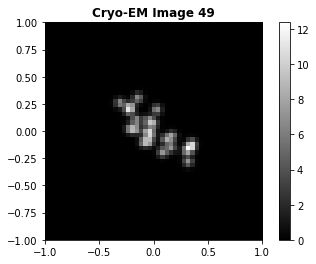

In [ ]:
x0 = torch.tensor(np.asarray(state0.getPositions(asNumpy=True)))
temptest = torch_createblobs(x0, Q=1, n_cells=51, scale=0.001, noise=1, rot_mat=rot_mats[-1])  #torch.eye(3).double()

c = plt.imshow(temptest, cmap ='gray', vmin = 0, vmax = np.abs(temptest).max(),\
                extent = [-1, 1, -1, 1], interpolation = 'nearest', origin = 'lower')
plt.colorbar(c)
                
plt.title(f'Cryo-EM Image {idx}', fontweight = "bold")
plt.show()

In [ ]:
class architecture(nn.Module):
    def __init__(self, n_cells=51, template=x0):
        super().__init__()
        self.template = template

        self.mlp = nn.Sequential(
            nn.Linear(3, 8),
            nn.ReLU(),
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Linear(8, 3)
        )

    def torch_createblobs(self, coords, Q=1, n_cells=51, scale=0.001, noise=25, rot_mat=torch.eye(3)):
        # Grids of x and y points
        x = torch.linspace(-Q, Q, n_cells)
        y = torch.linspace(-Q, Q, n_cells)
        # Create a 2-D meshgrid of (x, y) coordinates.
        x, y = torch.meshgrid(x, y, indexing='xy')

        normals = torch.zeros_like(x)

        # Creating mixture of gaussians
        pos = torch.empty(x.shape + (2,)).double()
        pos[:, :, 0] = x
        pos[:, :, 1] = y

        new_coords = (self.template + self.mlp(coords - self.template)) @ rot_mat.T

        for row in new_coords.double():
            var = torch.distributions.multivariate_normal.MultivariateNormal(row[0:2], scale*torch.eye(2).double())
            normals = normals + torch.exp(var.log_prob(pos))

        return normals
    

    def forward(self, coords, rotmat_list):
        for i in range(len(img_list)):
            coords = self.template + self.mlp(img_list[i] - self.template)
            
        for rot in rotmat_list:
            rotated_coords = torch.mm(new_coords, torch.tensor(rot, dtype=torch.float).T)
            #print(len(recons_imgs))
            recons_img = self.gaussian_blobs(rotated_coords)
            recons_imgs.append(recons_img)
        
        return torch.stack(recons_imgs)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3, 
                             weight_decay=1e-5)

num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))